In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook

In [14]:
#Task 1.1
def pol_data(features_train, degree): 
    F_train = np.ones(features_train.shape)      
    for i in range(1,degree + 1):
        F_train = np.column_stack((F_train, (features_train ** i)))
    return F_train

In [15]:
def pol_regression(features_train, y_train, degree):  
    F_train = pol_data(features_train, degree)
    if degree == 0:
        return 0
    FF_train = F_train.transpose().dot(F_train)
    #FY_train = F_train.transpose().dot(y_train)
    parameters = np.linalg.solve(FF_train, F_train.transpose().dot(y_train))

    return parameters

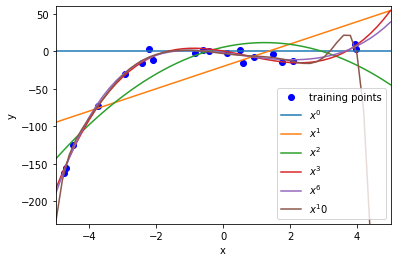

In [16]:
#Task 1.2

#Read the file
pol_file = pd.read_csv('Task1 - dataset - pol_regression.csv')
#Creating a numpty array for training data
x_train = pol_file['x'] 
y_train = pol_file['y'] 

x_values = np.linspace(-5,5,51)
plt.xlim(-5,5)
plt.ylim(-230,60)

plt.xlabel("x")
plt.ylabel("y")

degrees = [0,1,2,3,6,10]

plt.plot(x_train,y_train, 'bo')

#pol_regression(x_regression, y_regression ,0)

for i in range(0, len(degrees)):
    w = pol_regression(x_train,y_train,degrees[i])
    Xtest = pol_data(x_values, degrees[i])
    ytest = Xtest.dot(w)
    plt.plot(x_values, ytest)

plt.legend(('training points', '$x^0$', '$x^1$', '$x^2$', '$x^3$', '$x^6$', '$x^10$'), loc = 'lower right')

In [17]:
#Task 1.3
import math
from sklearn.model_selection import train_test_split

def eval_pol_regression(parameters, x, y, degree): 
    X_value = pol_data(x, degree)
    mse = np.square(X_value.dot(parameters)-y).mean() 
    
    rmse = np.sqrt(mse)
    return rmse

In [18]:
X_train, x_test, Y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

MSSEtrain = np.zeros((len(degrees),1))
MSSEtest = np.zeros((len(degrees),1))

for i in range(0, len(degrees)):   
    w = pol_regression(X_train,Y_train,degrees[i])
    
    MSSEtrain[i] = eval_pol_regression(w, X_train, Y_train, degrees[i])
    MSSEtest[i] = eval_pol_regression(w, x_test, y_test, degrees[i])

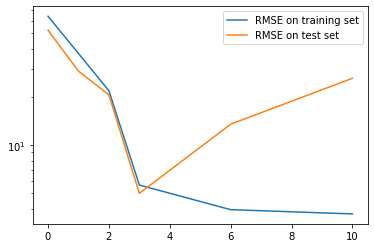

In [19]:
plt.figure();
plt.semilogy(degrees,MSSEtrain )
plt.semilogy(degrees, MSSEtest)
plt.legend(('RMSE on training set', 'RMSE on test set'))
plt.show()

# Task 2

In [20]:
#This works
# def compute_euclidean_distance(vec_1, vec_2):
#     #distance = np.linalg.norm(vec_1 - vec_2)
#     distance = np.sqrt(np.sum(np.square(vec_1 - vec_2))) #If we can't use linalg.norm
#     return distance

# def initialise_centroids(dataset, k): 
#     #randomly select data from the dataset.
#     centroids = dataset[np.random.randint(dataset.shape[0], size=k)]
#     return centroids

# def kmeans(dataset, k):
#     centroids = initialise_centroids(dataset, k)
    
#     cluster_assigned = np.zeros(dataset.shape[0])
#     distance = np.zeros([dataset.shape[0], k]) 
    
#     ## Loop over until the end of the database
#     for i in range(len(dataset)):
#         # # Use the euclidean distance function to assign point from the database to the nearest centroid
#         for i, centroid in enumerate(centroids):
#             distance[:, i] = compute_euclidean_distance(centroid, dataset)

#         # Determine class membership of each point
#         # by picking the closest centroid
#         cluster_assigned = np.argmin(distance, axis=1)

#         # Update centroid location using the newly
#         # assigned data point classes
#         for centroid in range(k):
#             centroids[centroid] = np.mean(dataset[cluster_assigned == centroid], 0)
    
        
#     return centroids, cluster_assigned



In [21]:
# def compute_euclidean_distance(vec_1, vec_2):
#     #distance = np.linalg.norm(vec_1 - vec_2)
#     distance = np.sqrt(np.sum(np.square(vec_1 - vec_2))) #If we can't use linalg.norm
#     return distance

# def initialise_centroids(dataset, k): 
#     #randomly select data from the dataset.
#     centroids = dataset[np.random.randint(dataset.shape[0], size=k)]
#     return centroids

# def kmeans(dataset, k):
#     centroids = initialise_centroids(dataset, k)
    
#     cluster_assigned = np.zeros(dataset.shape[0])
#     distance = np.zeros([dataset.shape[0], k]) 
#     d = dict(enumerate(centroids.flatten(), 1))
#     ## Loop over until the end of the database
#     for i in range(len(dataset)):
#         # # Use the euclidean distance function to assign point from the database to the nearest centroid
#         for i, centroid in enumerate(centroids):
#             distance[:, i] = compute_euclidean_distance(centroid, dataset[i])

#         # Determine class membership of each point
#         # by picking the closest centroid
#         cluster_assigned = np.argmin(distance, axis=1)

#         # Update centroid location using the newly
#         # assigned data point classes
#         for centroid in range(k):
#             centroids[centroid] = np.mean(dataset[cluster_assigned == centroid], 0)
    
        
#     return centroids, cluster_assigned

In [22]:
def compute_euclidean_distance(vec_1, vec_2):
    #distance = np.linalg.norm(vec_1 - vec_2)
    distance = np.sqrt(np.sum(np.square(vec_1 - vec_2))) #If we can't use linalg.norm
    return distance

def initialise_centroids(dataset, k): 
    #randomly select data from the dataset.
    centroids = dataset[np.random.randint(dataset.shape[0], size=k)]
    return centroids

def kmeans(dataset, k):
    centroids = initialise_centroids(dataset, k)
    
    cluster_assigned = np.zeros(dataset.shape[0])
    distance = np.zeros([dataset.shape[0], k]) 

    ## Loop over until the end of the database
    for i in range(len(dataset)):
        # # Use the euclidean distance function to assign point from the database to the nearest centroid
        for i, centroid in enumerate(centroids):
            distance[:, i] = compute_euclidean_distance(centroid, dataset[i])

        # Determine class membership of each point
        # by picking the closest centroid
        cluster_assigned = np.argmin(distance, axis=1)

        # Update centroid location using the newly 
        # assigned data point classes
        for centroid in range(k):
            centroids[centroid] = np.mean(dataset[cluster_assigned == centroid], 0)
    
        
    return centroids, cluster_assigned

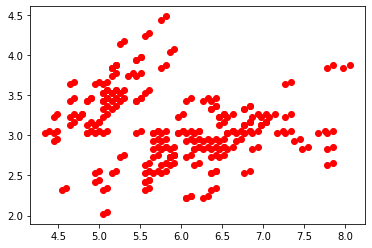

In [23]:
K = 3
k_file = pd.read_csv('Task2 - dataset - dog_breeds.csv', header = 'infer').values


# show the scatter plot of the data
# ... insert code here ...
plt.scatter(k_file[:, 0], k_file[:, 1], c='r')

# plot figure
plt.show()



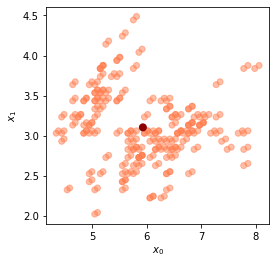

In [26]:
centroids, clusters_set = kmeans(k_file, K)
group_colors = ['skyblue', 'coral', 'lightgreen']
colors = [group_colors[j] for j in clusters_set]

plt.subplots(figsize=(4,4))
plt.scatter(k_file[:,0], k_file[:,1], color=colors, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$');

